<a href="https://colab.research.google.com/github/RyoNaruse/aiuaiu/blob/master/AI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. githubリポジトリ内のjupyter notebookを開く
2. URLの”https://github.com" を ”https://colab.research.google.com/github” に置き換えてEnter。

～～～～～プログラミングのキホンのキ～～～～～

In [0]:
#変数に値を代入してみよう！
#変数の中身を表示してみよう！
x = 3
print(x)
print(type(x))

3
<class 'int'>


In [0]:
y = 0.5
print(y)
print(type(y))

0.5
<class 'float'>


In [0]:
#関数を作ってみよう！
def nijou(a):
    result = a * a
    print(a)
    print(type(a))
    print(result)
    return result

In [0]:
#関数を実行してみよう
y = nijou(5)

5
<class 'int'>
25


In [0]:
print(y)

25


In [0]:
#キーボードから入力を取得するinput関数を使う
a = int(input())
print(nijou(a))

6
6
<class 'int'>
36
36


～～～～～手書き文字分類～～～～～

In [0]:
#データのダウンロード
from sklearn import  datasets
mnist = datasets.load_digits()

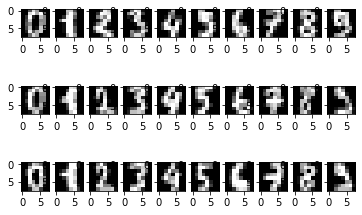

In [0]:
#データの確認
import matplotlib.pyplot as plt

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(mnist.images[i],'gray')
plt.show()

(1797, 8, 8)


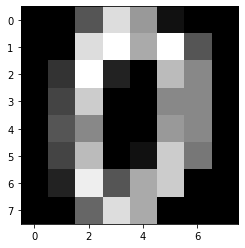

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [0]:
print(mnist.images.shape)

plt.subplot(1,1,1)  
plt.imshow(mnist.images[0],'gray')  #画像として表示
plt.show()

print(mnist.images[0])  #行列として表示

In [0]:
print(mnist.data[0])   #横に並べた配列として表示

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [0]:
print(mnist.target)

[0 1 2 ... 8 9 8]


In [0]:
#k-means法でデータを分類してみる
from sklearn.cluster import KMeans

In [0]:
model = KMeans(n_clusters=10)   #与えたデータを10個に分ける機械を作成

In [0]:
model.fit(mnist.data)   #分類を実行

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(model.cluster_centers_)   #各クラスターの中心を配列で表示

[1 0 0 ... 0 9 9]
[[ 0.00000000e+00  1.12107623e-01  3.98654709e+00  1.18789238e+01
   1.23766816e+01  5.38565022e+00  4.34977578e-01 -3.33066907e-16
   8.96860987e-03  8.60986547e-01  8.22869955e+00  1.35650224e+01
   1.26008969e+01  9.86098655e+00  1.57399103e+00  4.30211422e-16
  -1.51788304e-17  1.21973094e+00  8.33632287e+00  1.19147982e+01
   1.23408072e+01  9.44843049e+00  1.03139013e+00 -9.02056208e-17
  -3.25260652e-18  9.46188341e-01  7.22869955e+00  1.40896861e+01
   1.41748879e+01  4.94618834e+00  2.01793722e-01 -6.50521303e-18
   0.00000000e+00  7.71300448e-01  8.02242152e+00  1.47847534e+01
   1.29013453e+01  2.19730942e+00  1.79372197e-02  0.00000000e+00
  -2.60208521e-17  1.23318386e+00  1.05022422e+01  1.20089686e+01
   1.21479821e+01  4.04484305e+00  2.01793722e-01  3.46944695e-17
   1.34529148e-02  8.78923767e-01  9.60538117e+00  1.15515695e+01
   1.21121076e+01  5.60089686e+00  6.18834081e-01  4.48430493e-03
   4.48430493e-03  1.12107623e-01  4.19282511e+00  1.19910

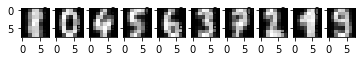

In [0]:
centers = model.cluster_centers_.reshape(10,8,8)    #各クラスターの中心を画像で表示

for i in range(10): 
    plt.subplot(1,10,i+1)
    plt.imshow(centers[i],'gray')
plt.show()


In [0]:
import numpy as np      #「どの数字がどのグループに割り振られたか」を表にしてみる

label = np.zeros((10,10), 'int')    #全て0で構成された10行10列のゼロ行列を作成する

for i in range(len(mnist.target)):
    label[mnist.target[i], model.labels_[i]] += 1
    
print(label)

[[  0 177   1   0   0   0   0   0   0   0]
 [ 99   0   0   1   2   1   0  24  55   0]
 [  8   1   0   0   0  13   3 148   2   2]
 [  7   0   0   2   0 155   7   0   0  12]
 [  3   0 164   0   0   0   9   0   5   0]
 [  0   0   2 136   1   2   0   0   0  41]
 [  2   1   0   0 177   0   0   0   1   0]
 [  2   0   0   1   0   0 174   0   2   0]
 [100   0   0   4   2   2   5   3   6  52]
 [  2   0   0   6   0   6   7   0  20 139]]


～～～～～番外編　教師有り学習で手書き文字を当てる～～～～～

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
#データを学習に使うものと、予測に使うものに分ける
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(898, 64)
(899, 64)
(898,)
(899,)


In [0]:
#分類器を作成して、データとその答えを学習させる
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#行番号が正解ラベル、列番号が分類器の予想ラベル
print(confusion_matrix(y_test, kn_model.predict(x_test)))

[[ 92   0   0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0]
 [  0   0  83   0   0   0   0   1   0   0]
 [  0   0   0  84   0   0   0   1   1   0]
 [  0   0   0   0  89   0   0   1   0   2]
 [  0   0   0   0   0  90   0   0   0   0]
 [  0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0  81   0   1]
 [  0   2   0   1   0   1   0   0  86   1]
 [  0   1   0   2   0   1   0   0   1  80]]
